In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import datetime, pickle, math
from tqdm.notebook import tqdm_notebook

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [4]:
#Loading the labeled dataset
file1 = open("labeled_dataset_thesis_params3.pickle", "rb")
labeled_df = pickle.load(file1)
file1.close()

**1. Fraction of trades with profit label YoY**

In [116]:
df1=[]
years=list(labeled_df.Current_Year.unique())
years.remove(2022)
for i in years:
    df1.append(labeled_df[(labeled_df.Rel_ExDD!='Invalid') & (labeled_df.Current_Year!=i)].Label.value_counts(normalize=True).to_frame(str(i)))
df1_merge=pd.concat(df1, axis=1)

<Figure size 1080x360 with 0 Axes>

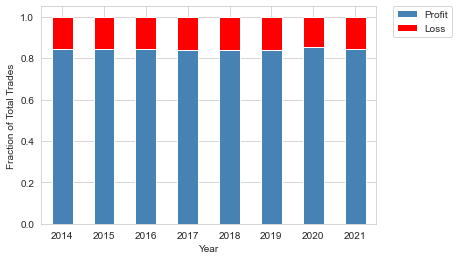

In [117]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df1_merge.transpose().plot(kind='bar',stacked=True, color=['steelblue', 'red'])
plt.ylabel('Fraction of Total Trades')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)
plt.show()

**2. Fraction of trades with profit label by number of days prior ex-dividend date**

In [86]:
df2=[]
for i in labeled_df.Rel_ExDD.unique():
    df2.append(labeled_df[labeled_df.Rel_ExDD==i].Label.value_counts(normalize=True).to_frame(str(i)))
df2_merge=pd.concat(df2, axis=1)

<Figure size 1080x360 with 0 Axes>

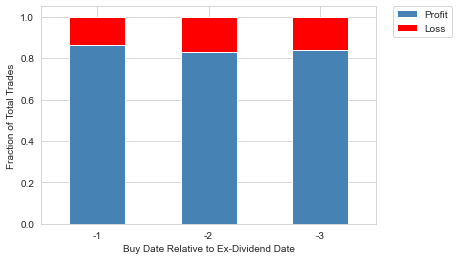

In [90]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df2_merge.transpose().plot(kind='bar',stacked=True, color=['steelblue', 'red'])
plt.ylabel('Fraction of Total Trades')
plt.xlabel('Buy Date Relative to Ex-Dividend Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)
plt.show()

**3. Distribution of Trade P/L Percentages: Absolute and by number of days prior to ex-dividend date**

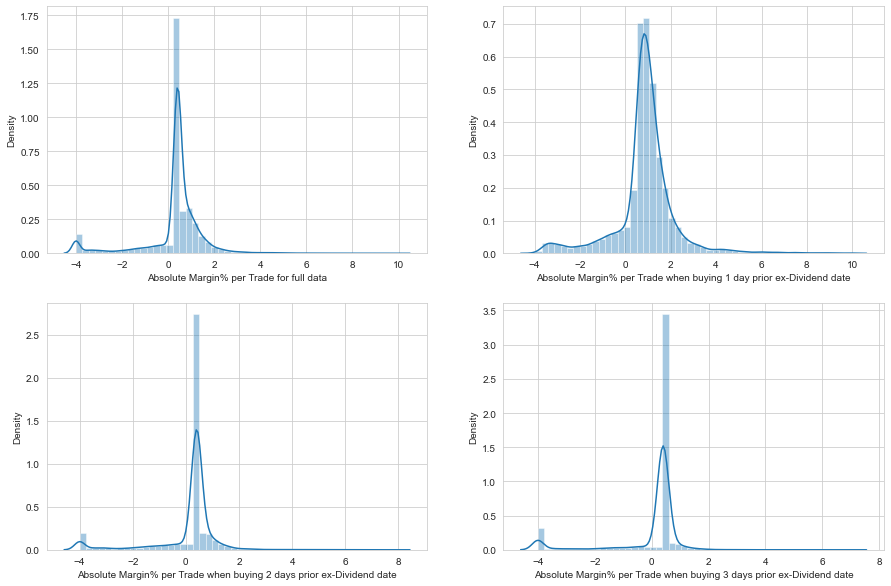

In [149]:
plt.figure(0, figsize=(15,10))

plt.subplot(221)
sns.distplot(labeled_df[labeled_df['Trade P/L %']<0.1]['Trade P/L %']*100)
plt.xlabel('Absolute Margin% per Trade for full data')

plt.subplot(222)
sns.distplot(labeled_df[(labeled_df['Trade P/L %']<0.1) & (labeled_df.Rel_ExDD==-1)]['Trade P/L %']*100)
plt.xlabel('Absolute Margin% per Trade when buying 1 day prior ex-Dividend date')

plt.subplot(223)
sns.distplot(labeled_df[(labeled_df['Trade P/L %']<0.1) & (labeled_df.Rel_ExDD==-2)]['Trade P/L %']*100)
plt.xlabel('Absolute Margin% per Trade when buying 2 days prior ex-Dividend date')

plt.subplot(224)
sns.distplot(labeled_df[(labeled_df['Trade P/L %']<0.1) & (labeled_df.Rel_ExDD==-3)]['Trade P/L %']*100)
plt.xlabel('Absolute Margin% per Trade when buying 3 days prior ex-Dividend date')

plt.show()

**4. Dividend Yield Mean/Std_Dev by Quarter/Year, Month/Year and Year**

In [118]:
df3=[]
years=list(labeled_df.Current_Year.unique())
years.remove(2022)
for i in years:
    df3.append(labeled_df[labeled_df.Current_Year==i].groupby(by='Quarter')['Dividend/p_Pc'].mean().to_frame(str(i)))
df3_merge=pd.concat(df3, axis=1)

In [145]:
for col in df3_merge.columns:
    df3_merge[col]=df3_merge[col].apply(lambda x:100*x)

<Figure size 1080x360 with 0 Axes>

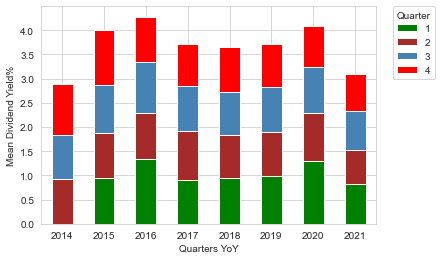

In [146]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df3_merge.transpose().plot(kind='bar',stacked=True, color=['green','brown','steelblue', 'red'])
plt.ylabel('Mean Dividend Yield%')
plt.xlabel('Quarters YoY')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Quarter')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 0, 'Quarterly Dividend Yield%')

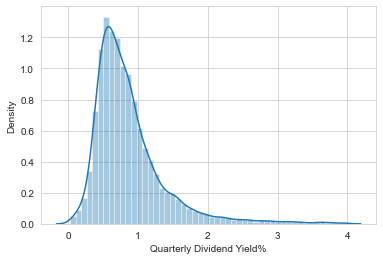

In [151]:
sns.distplot(labeled_df[labeled_df['Dividend/p_Pc']<0.04]['Dividend/p_Pc']*100.00)
plt.xlabel('Quarterly Dividend Yield%')

**5. Stocks never profitable, always profitable, never in training, always in training**

In [138]:
always_in_loss=[]
always_in_profit=[]
always_in_loss_in_train_data=[]
always_in_profit_in_train_data=[]
for ticker in labeled_df.ticker.unique():
    if len(labeled_df[(labeled_df.Current_Year!=2022)  & (labeled_df['Trade P/L']<0) & (labeled_df.ticker==ticker)])==len(labeled_df[(labeled_df.Current_Year!=2022) & (labeled_df.ticker==ticker)]):
        always_in_loss.append(ticker)
    elif len(labeled_df[(labeled_df.Current_Year!=2022)  & (labeled_df['Trade P/L']>0) & (labeled_df.ticker==ticker)])==len(labeled_df[(labeled_df.Current_Year!=2022) & (labeled_df.ticker==ticker)]):
        always_in_profit.append(ticker)
        
    if len(labeled_df[(labeled_df.Current_Year<2019)  & (labeled_df['Trade P/L']<0) & (labeled_df.ticker==ticker)])==len(labeled_df[(labeled_df.Current_Year<2019) & (labeled_df.ticker==ticker)]):
        always_in_loss_in_train_data.append(ticker)
    elif len(labeled_df[(labeled_df.Current_Year<2019)  & (labeled_df['Trade P/L']>0) & (labeled_df.ticker==ticker)])==len(labeled_df[(labeled_df.Current_Year<2019) & (labeled_df.ticker==ticker)]):
        always_in_profit_in_train_data.append(ticker)

In [139]:
always_in_loss

[]

In [140]:
always_in_profit

['SAP', 'NVS']

In [141]:
always_in_loss_in_train_data

['VST', 'DOW', 'FOXA', 'CTVA', 'YY', 'RPRX']

In [142]:
always_in_profit_in_train_data

['GSK', 'SAP', 'NLY', 'AZN', 'PGR', 'NVS', 'NTR']